In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('C:/Users/Divya/Downloads/classification dataset.csv')

In [3]:
df.head()

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership,Target
0,67,Other,58781,Bachelor's,Self-Employed,653,No,Yes,Approved
1,33,Female,38270,High School,Employed,380,Yes,No,Approved
2,64,Other,93364,High School,Self-Employed,391,Yes,No,Denied
3,22,Male,46767,High School,Self-Employed,659,Yes,Yes,Approved
4,29,Male,44750,Master's,Employed,415,No,No,Approved


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1000 non-null   int64 
 1   Gender             1000 non-null   object
 2   Income             1000 non-null   int64 
 3   Education_Level    1000 non-null   object
 4   Employment_Status  1000 non-null   object
 5   Credit_Score       1000 non-null   int64 
 6   Owns_House         1000 non-null   object
 7   Car_Ownership      1000 non-null   object
 8   Target             1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [6]:
categorical_columns

Index(['Gender', 'Education_Level', 'Employment_Status', 'Owns_House',
       'Car_Ownership', 'Target'],
      dtype='object')

In [7]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [8]:
numeric_columns

Index(['Age', 'Income', 'Credit_Score'], dtype='object')

In [9]:
df.head()

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership,Target
0,67,Other,58781,Bachelor's,Self-Employed,653,No,Yes,Approved
1,33,Female,38270,High School,Employed,380,Yes,No,Approved
2,64,Other,93364,High School,Self-Employed,391,Yes,No,Denied
3,22,Male,46767,High School,Self-Employed,659,Yes,Yes,Approved
4,29,Male,44750,Master's,Employed,415,No,No,Approved


In [10]:
oe = OrdinalEncoder()
df[categorical_columns] = oe.fit_transform(df[categorical_columns])

In [11]:
df.head()

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership,Target
0,67,2.0,58781,0.0,1.0,653,0.0,1.0,0.0
1,33,0.0,38270,1.0,0.0,380,1.0,0.0,0.0
2,64,2.0,93364,1.0,1.0,391,1.0,0.0,1.0
3,22,1.0,46767,1.0,1.0,659,1.0,1.0,0.0
4,29,1.0,44750,2.0,0.0,415,0.0,0.0,0.0


In [12]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [13]:
df.head()

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership,Target
0,1.551889,2.0,-0.335148,0.0,1.0,0.457248,0.0,1.0,0.0
1,-0.670979,0.0,-1.028613,1.0,0.0,-1.291397,1.0,0.0,0.0
2,1.355754,2.0,0.834082,1.0,1.0,-1.220939,1.0,0.0,1.0
3,-1.390143,1.0,-0.741335,1.0,1.0,0.495680,1.0,1.0,0.0
4,-0.932493,1.0,-0.809528,2.0,0.0,-1.067212,0.0,0.0,0.0


In [14]:
X = df.drop(columns=["Target"]) 
y = df["Target"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership
29,0.375076,2.0,-1.344765,2.0,1.0,0.431627,0.0,0.0
535,-0.213330,0.0,1.193746,2.0,0.0,0.892808,1.0,1.0
695,-1.520900,1.0,-1.540690,0.0,2.0,0.444438,1.0,0.0
557,0.701969,2.0,0.139705,2.0,3.0,0.559733,1.0,0.0
836,-0.147952,2.0,-0.848138,1.0,0.0,0.117768,1.0,1.0
...,...,...,...,...,...,...,...,...
106,0.113562,0.0,-0.046788,3.0,3.0,-1.483556,1.0,1.0
270,-0.409466,0.0,-1.174974,3.0,2.0,0.233063,1.0,0.0
860,-1.324764,1.0,0.143288,2.0,1.0,1.699875,1.0,0.0
435,1.224997,0.0,-1.238434,2.0,2.0,0.309927,0.0,0.0


In [17]:
X_test

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership
521,0.963483,1.0,1.020811,2.0,3.0,0.796729,0.0,0.0
737,-0.736358,0.0,1.129373,3.0,0.0,1.424448,0.0,1.0
740,1.486511,2.0,-0.940641,1.0,2.0,-1.284992,1.0,0.0
660,0.375076,2.0,-1.435475,2.0,0.0,-0.670083,0.0,1.0
411,-1.651657,2.0,1.418173,2.0,1.0,-0.907079,1.0,1.0
...,...,...,...,...,...,...,...,...
408,-0.147952,2.0,0.941021,3.0,3.0,1.270721,0.0,1.0
332,-1.194007,1.0,-0.128235,2.0,1.0,-0.548383,1.0,0.0
208,0.832726,1.0,-1.364442,1.0,3.0,0.245874,1.0,1.0
613,1.355754,0.0,-1.252499,3.0,0.0,-1.349045,0.0,1.0


In [18]:
y_test

521    1.0
737    1.0
740    1.0
660    1.0
411    0.0
      ... 
408    0.0
332    1.0
208    1.0
613    0.0
78     1.0
Name: Target, Length: 200, dtype: float64

In [19]:
y_train

29     1.0
535    0.0
695    0.0
557    1.0
836    0.0
      ... 
106    1.0
270    1.0
860    0.0
435    0.0
102    0.0
Name: Target, Length: 800, dtype: float64

In [20]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.])

In [23]:
accuracy = accuracy_score(y_test, y_pred)

In [24]:
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.49


In [25]:
report = classification_report(y_test, y_pred)

In [26]:
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.47      0.49      0.48        95
         1.0       0.52      0.49      0.50       105

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[47 48]
 [54 51]]


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

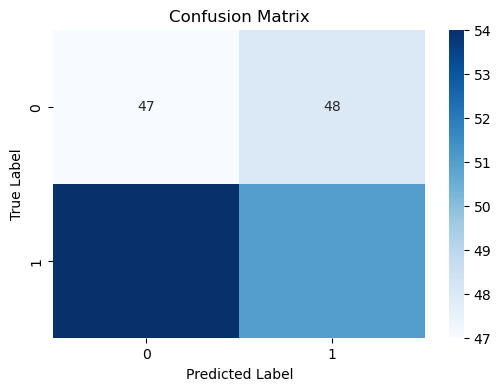

In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [37]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
accuracy = accuracy_score(y_test, y_pred)

In [39]:
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.49


In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[47 48]
 [54 51]]


# Logistic regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [48]:
label_encoders = {}
for col in ["Gender", "Education_Level", "Employment_Status", "Owns_House", "Car_Ownership", "Target"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [49]:
X = df.drop(columns=["Target"])
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)

In [57]:
accuracy

0.48

In [56]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.46      0.58      0.51        95
           1       0.51      0.39      0.44       105

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.48      0.48       200



In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[55 40]
 [64 41]]


# difference b/w confusion matrix of LR and DT Algorithm

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

conf_matrix_lr = confusion_matrix(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

conf_matrix_lr, conf_matrix_dt

(array([[55, 40],
        [64, 41]], dtype=int64),
 array([[48, 47],
        [49, 56]], dtype=int64))

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

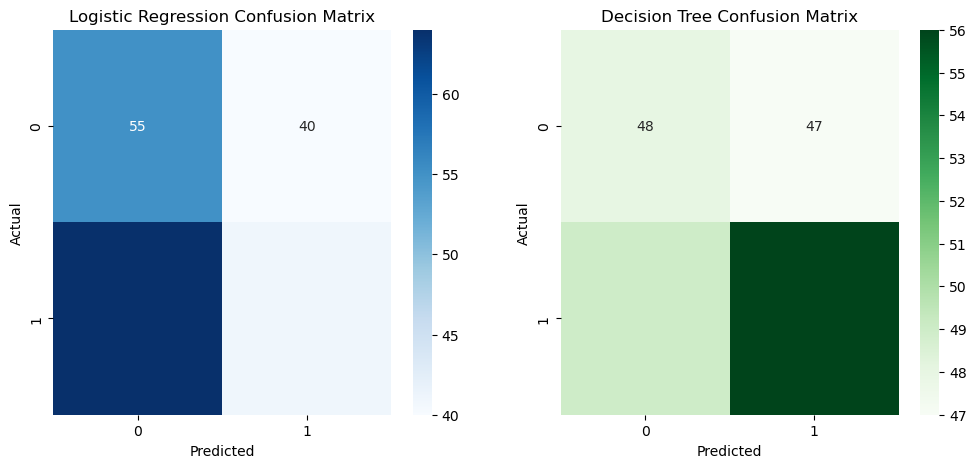

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

In [72]:
import numpy as np
correlation = np.corrcoef(y_pred, y_pred_dt)
print("Correlation between Logistic Regression and Decision Tree predictions:", correlation)

Correlation between Logistic Regression and Decision Tree predictions: [[1.         0.16885038]
 [0.16885038 1.        ]]


In [73]:
import numpy as np
correlation = np.corrcoef(y_pred, y_pred_dt)[0, 1]
print("Correlation between Logistic Regression and Decision Tree predictions:", correlation)

Correlation between Logistic Regression and Decision Tree predictions: 0.168850378615925


In [76]:
import pandas as pd
predictions_df = pd.DataFrame({
    "Logistic_Regression": y_pred,
    "Decision_Tree": y_pred_dt
})
correlation_matrix = predictions_df.corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                      Logistic_Regression  Decision_Tree
Logistic_Regression              1.00000        0.16885
Decision_Tree                    0.16885        1.00000
